geändert: 
- StratifiedKFold anstelle KFold
- tolerance ist jetzt mit drin
- bei einzel-Tuning alle anderen werte auf default (vergleichbar mit RandomForest tuning)


In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt

# Laden des Datensatzes
df = pd.read_csv('GeneralDatensatz18-21ohneGeo-mitLockdown_mitCorona.csv', sep=';')

# Features und Zielvariable definieren
X = df[['UMONAT','USTUNDE','UWOCHENTAG','UART','USTRZUSTAND','BEZ','UTYP1','ULICHTVERH','IstRad','IstPKW','IstFuss','IstKrad','IstGkfz','IstSonstige', 'LOCKDOWN', 'COVID']]
y = df['UKATEGORIE'].isin([1, 2]).astype(int)  # 1 für schwere/tödliche Unfälle, 0 für leichte Unfälle

# KFold-Konfiguration
sf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definieren des F-beta-Scores mit beta = 2
beta = 2
fbeta_scorer = make_scorer(fbeta_score, beta=beta)

##Parameter für Hyperparametertuning
float_list_Cs = [x * 0.001 for x in range(1, 50)]

logistic__C = float_list_Cs
logistic__max_iter = list(range(100, 500, 20))
logistic__tol = [1e-4, 1e-3, 1e-2]
logistic__penalty = ['l2', 'l1', 'elasticnet']
logistic__solver = ['lbfgs', 'liblinear', 'sag', 'saga']

#logistic__C: Dieser Hyperparameter steuert die Stärke der Regularisierung. Niedrigere Werte bedeuten stärkere Regularisierung, was hilfreich sein kann, um Überanpassung zu vermeiden, besonders wenn die Daten unbalanciert sind und das Modell dazu neigt, die Mehrheitsklasse zu bevorzugen.  
#logistic__penalty: Bestimmt den Typ der Regularisierung. 'l2' ist die Standardoption, die dazu neigt, die Gewichte gleichmäßig zu verkleinern, was bei unbalancierten Daten nützlich sein kann, um die Komplexität des Modells zu kontrollieren.  
#logistic__solver: Der 'lbfgs'-Solver unterstützt die L2-Regularisierung und ist effizient für kleine Datensätze. Die Wahl des Solvers kann die Konvergenzgeschwindigkeit und die Handhabung von unbalancierten Daten beeinflussen.  
#logistic__max_iter: Die maximale Anzahl von Iterationen, die der Solver für die Konvergenz durchführt. Bei unbalancierten Daten kann es notwendig sein, diesen Wert zu erhöhen, um eine bessere Anpassung zu erzielen.  
#logistic__tol: Die Toleranz für das Stoppkriterium. Eine feinere Toleranz kann bei unbalancierten Daten helfen, indem sie sicherstellt, dass das Modell gründlich optimiert wird. 


C_value: 0.001 Fbeta Score Logistische Regression: 0.48161898970299255
C_value: 0.002 Fbeta Score Logistische Regression: 0.4820898908688383
C_value: 0.003 Fbeta Score Logistische Regression: 0.4826926596814878
C_value: 0.004 Fbeta Score Logistische Regression: 0.48329272073656504
C_value: 0.005 Fbeta Score Logistische Regression: 0.4836826161797846
C_value: 0.006 Fbeta Score Logistische Regression: 0.4838485585075446
C_value: 0.007 Fbeta Score Logistische Regression: 0.4841024032454301
C_value: 0.008 Fbeta Score Logistische Regression: 0.4843390152444601
C_value: 0.009000000000000001 Fbeta Score Logistische Regression: 0.48434352193780406
C_value: 0.01 Fbeta Score Logistische Regression: 0.48471310229056563
C_value: 0.011 Fbeta Score Logistische Regression: 0.4848328872452581
C_value: 0.012 Fbeta Score Logistische Regression: 0.484913835601823
C_value: 0.013000000000000001 Fbeta Score Logistische Regression: 0.4849163792677388
C_value: 0.014 Fbeta Score Logistische Regression: 0.48511

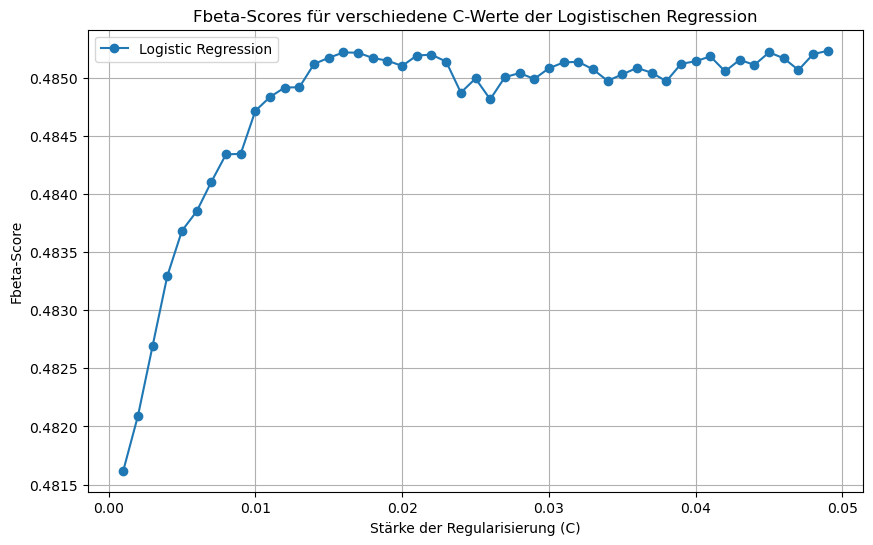

In [2]:
logReg_logistic__C = []

for C_value in logistic__C:
    log_reg = LogisticRegression(C=C_value, max_iter = 250, class_weight={0: 1, 1: 9})
    fbeta_reg = cross_val_score(log_reg, X, y, cv=sf, scoring=fbeta_scorer)
    print(f"C_value: {C_value} Fbeta Score Logistische Regression: {fbeta_reg.mean()}")
    logReg_logistic__C.append(fbeta_reg.mean())
    

# Fbeta-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(logistic__C, logReg_logistic__C, marker='o', label='Logistic Regression')
plt.title('Fbeta-Scores für verschiedene C-Werte der Logistischen Regression')
plt.xlabel('Stärke der Regularisierung (C)')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

max_iter_value: 50 Fbeta Score Logistische Regression: 0.48410883614503675


/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

max_iter_value: 70 Fbeta Score Logistische Regression: 0.48462246856787494


/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

max_iter_value: 90 Fbeta Score Logistische Regression: 0.48477463531835213


/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

max_iter_value: 110 Fbeta Score Logistische Regression: 0.48473959813057316


/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

max_iter_value: 130 Fbeta Score Logistische Regression: 0.4850051842304025
max_iter_value: 150 Fbeta Score Logistische Regression: 0.48497041698421367
max_iter_value: 170 Fbeta Score Logistische Regression: 0.48497041698421367
max_iter_value: 190 Fbeta Score Logistische Regression: 0.48497041698421367
max_iter_value: 210 Fbeta Score Logistische Regression: 0.48497041698421367
max_iter_value: 230 Fbeta Score Logistische Regression: 0.48497041698421367
max_iter_value: 250 Fbeta Score Logistische Regression: 0.48497041698421367
max_iter_value: 270 Fbeta Score Logistische Regression: 0.48497041698421367
max_iter_value: 290 Fbeta Score Logistische Regression: 0.48497041698421367
max_iter_value: 310 Fbeta Score Logistische Regression: 0.48497041698421367
max_iter_value: 330 Fbeta Score Logistische Regression: 0.48497041698421367
max_iter_value: 350 Fbeta Score Logistische Regression: 0.48497041698421367
max_iter_value: 370 Fbeta Score Logistische Regression: 0.48497041698421367
max_iter_valu

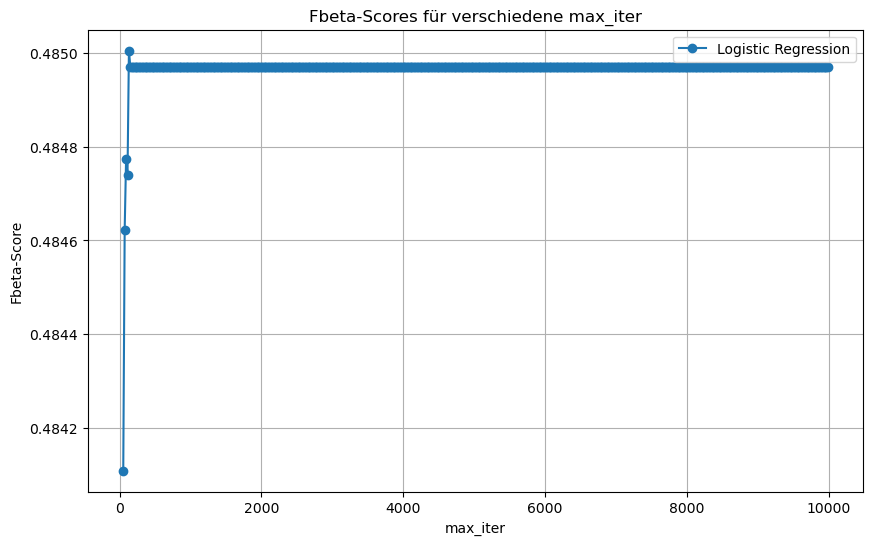

In [3]:

logReg_max_iter = []
for max_iter_value in logistic__max_iter:
    log_reg = LogisticRegression(max_iter=max_iter_value, class_weight={0: 1, 1: 9})
    fbeta_reg = cross_val_score(log_reg, X, y, cv=sf, scoring=fbeta_scorer)
    print(f"max_iter_value: {max_iter_value} Fbeta Score Logistische Regression: {fbeta_reg.mean()}")
    logReg_max_iter.append(fbeta_reg.mean())

# Fbeta-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(logistic__max_iter, logReg_max_iter, marker='o', label='Logistic Regression')
plt.title('Fbeta-Scores für verschiedene max_iter')
plt.xlabel('max_iter')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()

tol_value: 0.0001 Fbeta Score Logistische Regression: 0.48497041698421367
tol_value: 0.001 Fbeta Score Logistische Regression: 0.48497041698421367
tol_value: 0.01 Fbeta Score Logistische Regression: 0.48497041698421367


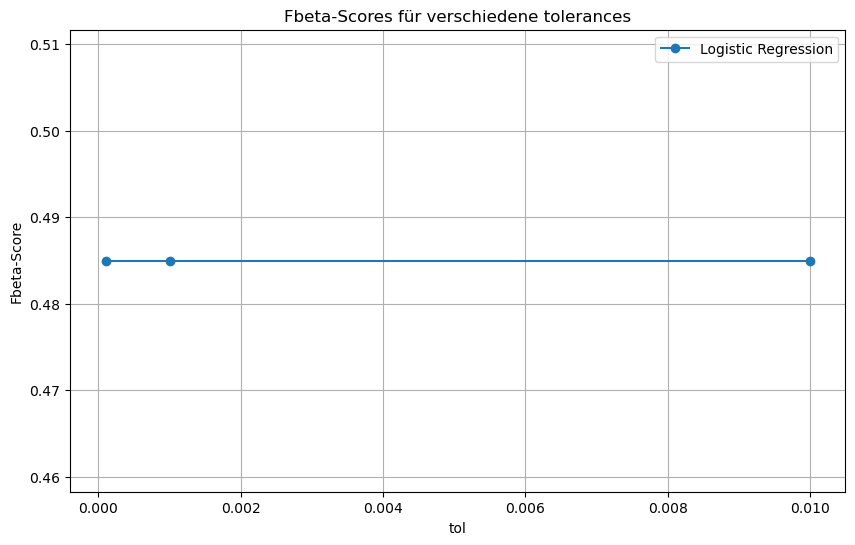

In [4]:
logReg_tol = []
for tol_value in logistic__tol:
    log_reg = LogisticRegression(tol=tol_value, max_iter = 150, class_weight={0: 1, 1: 9})
    fbeta_reg = cross_val_score(log_reg, X, y, cv=sf, scoring=fbeta_scorer)
    print(f"tol_value: {tol_value} Fbeta Score Logistische Regression: {fbeta_reg.mean()}")
    logReg_tol.append(fbeta_reg.mean())

# Fbeta-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(logistic__tol, logReg_tol, marker='o', label='Logistic Regression')
plt.title('Fbeta-Scores für verschiedene tolerances')
plt.xlabel('tol')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()

penalty_value: l2 Fbeta Score Logistische Regression: 0.48497041698421367
penalty_value: l1 Fbeta Score Logistische Regression: nan
penalty_value: elasticnet Fbeta Score Logistische Regression: nan


/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/miniconda3/envs/

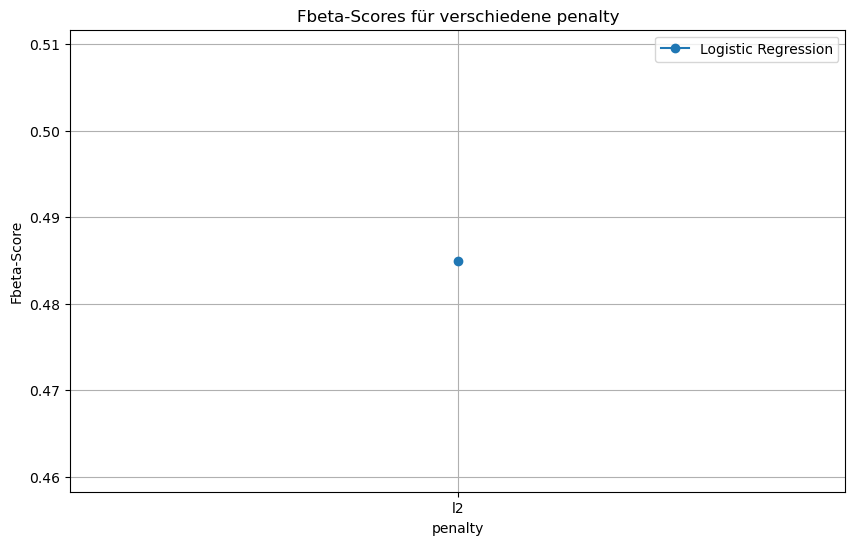

In [5]:
logReg_penalty = []
for penalty_value in logistic__penalty:
    log_reg = LogisticRegression(penalty=penalty_value, max_iter = 150, class_weight={0: 1, 1: 9})
    fbeta_reg = cross_val_score(log_reg, X, y, cv=sf, scoring=fbeta_scorer)
    print(f"penalty_value: {penalty_value} Fbeta Score Logistische Regression: {fbeta_reg.mean()}")
    logReg_penalty.append(fbeta_reg.mean())
    
# Fbeta-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(logistic__penalty, logReg_penalty, marker='o', label='Logistic Regression')
plt.title('Fbeta-Scores für verschiedene penalty')
plt.xlabel('penalty')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()


solver_value: lbfgs Fbeta Score Logistische Regression (k-fold): 0.48497041698421367
solver_value: liblinear Fbeta Score Logistische Regression (k-fold): 0.48483396156063713


/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_ite

solver_value: sag Fbeta Score Logistische Regression (k-fold): 0.3893532572623938


/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver_value: saga Fbeta Score Logistische Regression (k-fold): 0.45166941192469406


/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


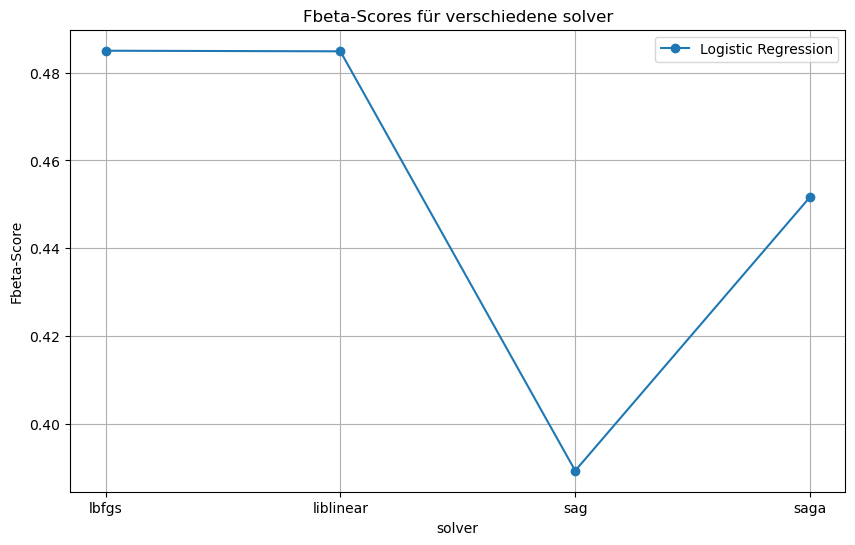

In [6]:
logReg_solver = []
for solver_value in logistic__solver:
    log_reg = LogisticRegression(solver=solver_value, max_iter = 150, class_weight={0: 1, 1: 9})
    fbeta_reg = cross_val_score(log_reg, X, y, cv=sf, scoring=fbeta_scorer)
    print(f"solver_value: {solver_value} Fbeta Score Logistische Regression (k-fold): {fbeta_reg.mean()}")
    logReg_solver.append(fbeta_reg.mean())
    
# Fbeta-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(logistic__solver, logReg_solver, marker='o', label='Logistic Regression')
plt.title('Fbeta-Scores für verschiedene solver')
plt.xlabel('solver')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()
